In [ ]:
from google.colab import files

uploaded = files.upload()

Saving in_domain_train.tsv to in_domain_train.tsv


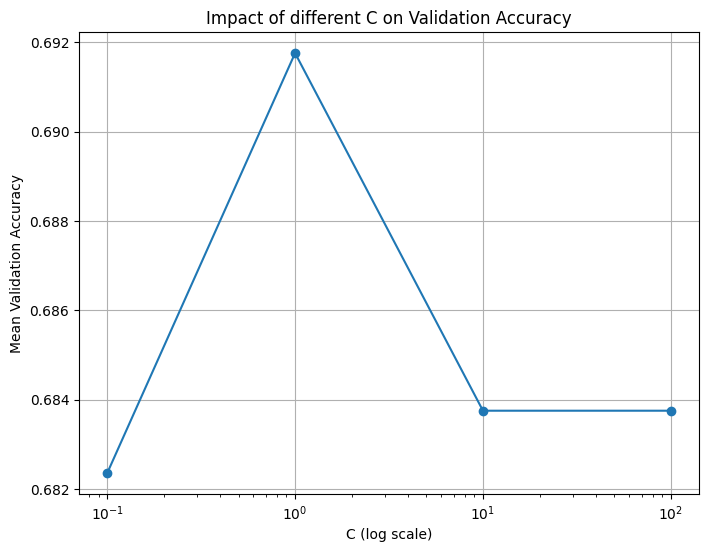

Best C value found: 1
Validation Precision: 0.734725050916497
Test Precision: 0.7276264591439688
Validation Accuracy: 0.5733918128654971
Test Accuracy: 0.5590643274853802
Validation Recall: 0.6060478790424192
Test Recall: 0.6121112929623568
Validation ROC_AUC: 0.5523020915905069
Test ROC_AUC: 0.519170400579539


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

data = pd.read_csv('in_domain_train.tsv', delimiter='\t')
sentences = data.iloc[:, 3]
labels = data.iloc[:, 1]

# Feature extraction using CountVectorizer and n_grams
training_texts, test_texts, training_labels, test_labels = train_test_split(sentences, labels, test_size=0.2, random_state=42)
train_texts, val_texts, train_labels, val_labels = train_test_split(training_texts, training_labels, test_size=0.5, random_state=42)
vectorizer = CountVectorizer(ngram_range=(1, 3))
train_vec = vectorizer.fit_transform(train_texts)
val_vec = vectorizer.transform(val_texts)
test_vec = vectorizer.transform(test_texts)

# Resampling with ADASYN
ada = ADASYN(random_state=42)
vec_resampled, labels_resampled = ada.fit_resample(X=train_vec, y=train_labels)

# Define a parameter grid for Grid Search with a range of C values
param_grid = {'C': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5)
grid_search.fit(vec_resampled, labels_resampled)

best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

# Visualize the impact of different 'C' values on validation accuracy
results = grid_search.cv_results_
c_values = [param['C'] for param in results['params']]
mean_val_scores = results['mean_test_score']

plt.figure(figsize=(8, 6))
plt.semilogx(c_values, mean_val_scores, marker='o')
plt.xlabel('C (log scale)')
plt.ylabel('Mean Validation Accuracy')
plt.title('Impact of different C on Validation Accuracy')
plt.grid(True)

plt.show()
validation_pred = best_svm_model.predict(val_vec)
test_pred = best_svm_model.predict(test_vec)

validation_accuracy = metrics.accuracy_score(val_labels, validation_pred)
validation_precision = metrics.precision_score(val_labels, validation_pred)
validation_recall = metrics.recall_score(val_labels, validation_pred)
validation_roc_auc = metrics.roc_auc_score(val_labels, validation_pred)

test_accuracy = metrics.accuracy_score(test_labels, test_pred)
test_precision = metrics.precision_score(test_labels, test_pred)
test_recall = metrics.recall_score(test_labels, test_pred)
test_roc_auc = metrics.roc_auc_score(test_labels, test_pred)

print(f"Best C value found: {best_params['C']}")
print(f"Validation Precision: {validation_precision}")
print(f"Test Precision: {test_precision}")
print(f"Validation Accuracy: {validation_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Validation Recall: {validation_recall}")
print(f"Test Recall: {test_recall}")
print(f"Validation ROC_AUC: {validation_roc_auc}")
print(f"Test ROC_AUC: {test_roc_auc}")




The code implements a Soft Margin Support Vector Machine (SVM) which introduces the regularization parameter 'C' to strike a balance between maximizing the margin and minimizing classification errors. This is particularly valuable when dealing with datasets where perfect separation between classes is not feasible. A larger 'C' results in a narrower margin but fewer misclassifications, while a smaller 'C' allows a wider margin and permits some misclassifications. The code searches for the best 'C' value by creating a parameter grid with different 'C' values and uses 5-fold cross-validation on the resampled training data to assess model performance for each 'C.' The best 'C' value is determined using GridSearchCV, and the corresponding SVM model with the optimal 'C' is obtained. This approach allows the SVM to adapt to the dataset's specific characteristics, finding the right balance between margin width and classification accuracy. It then evaluates the SVM's performance by calculating accuracy, precision, recall, and ROC-AUC.
